In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

name_char = "D"
N = int(ord(name_char) / 10) + 1
print(f"Ваш варіант: {N}")

Ваш варіант: 7


$$
\begin{cases}
3.2 x_{1} + 8.8 x_{2} = 89 \\
-14.2 x_{1} + 10.8 x_{2} = 125 \\
20.3 x_{1} - 7.2 x_{2} = 142
\end{cases}
$$

In [10]:
line1 = {'A': 3.2, 'B': 8.8, 'C': 89, 'style': '--', 'color': 'red', 'label': r'$3.2x_1 + 8.8x_2 = 89$'}
line2 = {'A': -14.2, 'B': 10.8, 'C': 125, 'style': '-.', 'color': 'purple', 'label': r'$-14.2x_1 + 10.8x_2 = 125$'}
line3 = {'A': 20.3, 'B': -7.2, 'C': 142, 'style': ':', 'color': 'brown', 'label': r'$20.3x_1 - 7.2x_2 = 142$'}

lines = [line1, line2, line3]

def get_x2(line, x1_arr):
    return (line['C'] - line['A'] * x1_arr) / line['B']

intersections = []
pairs = [(0, 1), (1, 2), (0, 2)]

print("Точки перетину:")
for i, j in pairs:
    A_matrix = np.array([
        [lines[i]['A'], lines[i]['B']],
        [lines[j]['A'], lines[j]['B']]
    ])
    B_vector = np.array([lines[i]['C'], lines[j]['C']])
    
    point = np.linalg.solve(A_matrix, B_vector)
    intersections.append(point)
    print(f"Lines {i+1} & {j+1}: x1={point[0]:.2f}, x2={point[1]:.2f}")

x_coords = [p[0] for p in intersections]
margin = 5
x_range = np.linspace(min(x_coords) - margin, max(x_coords) + margin, 400)

Точки перетину:
Lines 1 & 2: x1=-0.87, x2=10.43
Lines 2 & 3: x1=20.80, x2=38.92
Lines 1 & 3: x1=9.37, x2=6.71


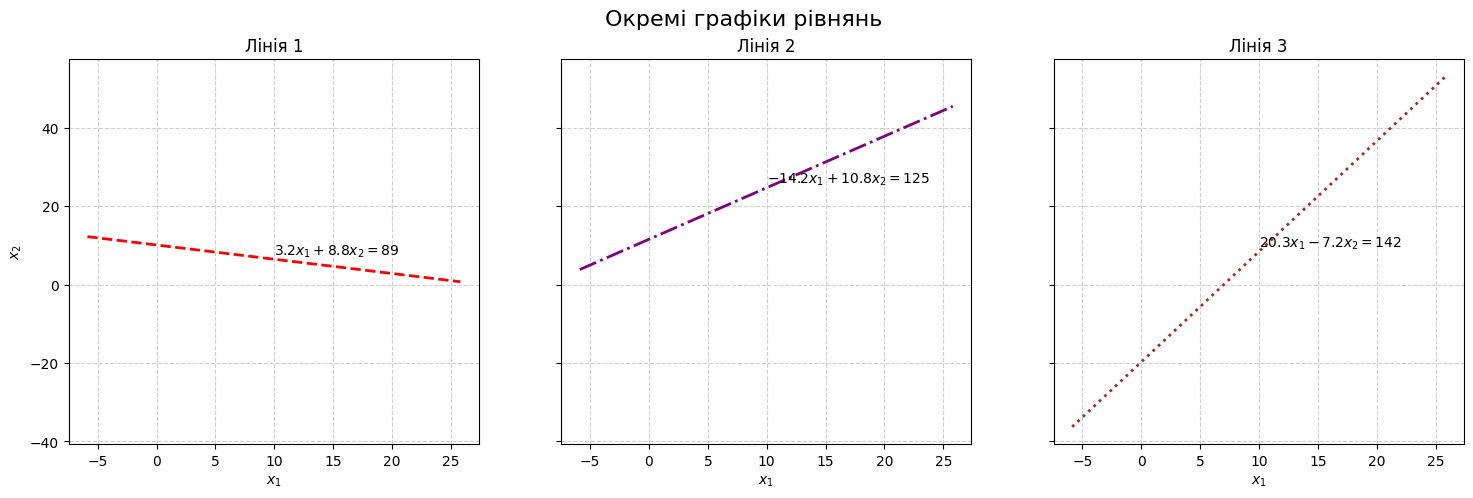

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for k, line in enumerate(lines):
    y_vals = get_x2(line, x_range)
    axs[k].plot(x_range, y_vals, color=line['color'], linestyle=line['style'], linewidth=2)
    axs[k].set_title(f"Лінія {k+1}")
    axs[k].set_xlabel(r'$x_1$')
    if k == 0:
        axs[k].set_ylabel(r'$x_2$')
    axs[k].grid(True, linestyle='--', alpha=0.6)
    axs[k].text(x_range[len(x_range)//2], y_vals[len(y_vals)//2], line['label'], 
                fontsize=10, rotation=0, verticalalignment='bottom')

plt.suptitle("Окремі графіки рівнянь", fontsize=16)
plt.show()

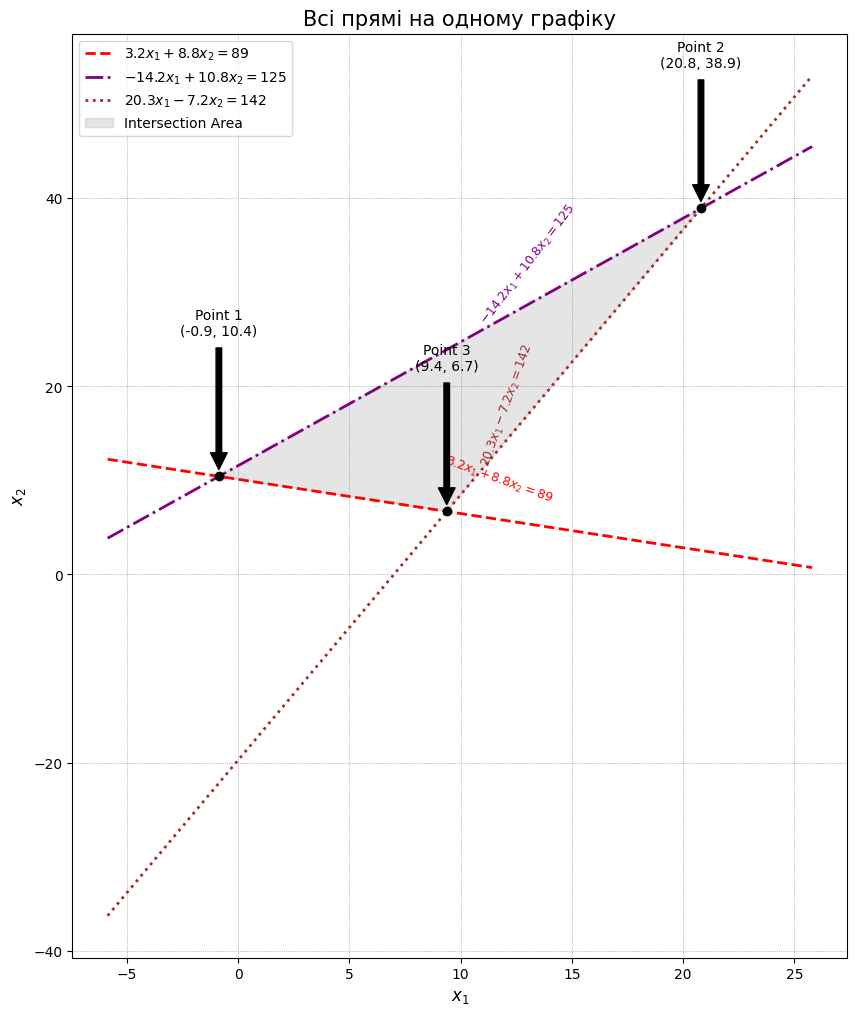

In [12]:
plt.figure(figsize=(10, 12), dpi=100)

for line in lines:
    plt.plot(x_range, get_x2(line, x_range), 
             color=line['color'], linestyle=line['style'], label=line['label'], linewidth=2)

    slope = -line['A'] / line['B']
    angle = np.degrees(np.arctan(slope))    
    idx = len(x_range) // 2 + (10 if slope > 0 else -10)
    plt.text(x_range[idx], get_x2(line, x_range)[idx] + 1, 
             line['label'], rotation=angle, fontsize=9, color=line['color'])

fill_x = [p[0] for p in intersections]
fill_y = [p[1] for p in intersections]
plt.fill(fill_x, fill_y, color='gray', alpha=0.2, label='Intersection Area')

for i, point in enumerate(intersections):
    plt.plot(point[0], point[1], 'ko')
    plt.annotate(f'Point {i+1}\n({point[0]:.1f}, {point[1]:.1f})', 
                 xy=(point[0], point[1]), xytext=(point[0], point[1]+15),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 horizontalalignment='center')

plt.title("Всі прямі на одному графіку", fontsize=15)
plt.xlabel(r'$x_1$', fontsize=12)
plt.ylabel(r'$x_2$', fontsize=12)
plt.legend(loc='best') 


plt.grid(True, color='gray', linestyle=':', linewidth=0.5)

plt.savefig("lab5_plot.jpg")
plt.savefig("lab5_plot.png")
plt.savefig("lab5_plot.svg")

plt.show()

### Висновки

У ході лабораторної роботи було побудовано графіки прямих ліній за допомогою бібліотеки Matplotlib.
Порівняння форматів збереження:
1. **JPG**: Стиснений формат, не підтримує прозорість. При сильному збільшенні видно артефакти стиснення навколо ліній та тексту. Розмір файлу найменший.
2. **PNG**: Формат без втрат якості (lossless), підтримує прозорість. Лінії чіткі, але при сильному масштабуванні з'являється пікселізація ("сходинки"). Оптимальний для вставки у звіти та веб.
3. **SVG**: Векторний формат. При будь-якому масштабуванні лінії залишаються ідеально гладкими. Текст залишається текстом (можна виділити). Найкращий для друку та подальшого редагування, але може не підтримуватися деякими простими переглядачами зображень.